<a href="https://colab.research.google.com/github/JHON-EDV/Regresion-Polinomica/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


%matplotlib inline

# Se cargan los datos
spo = pd.read_csv('https://raw.githubusercontent.com/JHON-EDV/Regresion-Polinomica/master/datos_regresion.csv',names=["x1","y1","y1r"])
# se imprimen los primeros 5 datos.
spo.head()

,x1,y1,y1r
0,0.612566,-3.718010,-3.818035
1,0.989950,-0.954053,-0.961823
2,0.527680,-3.082132,-3.214144
3,0.479523,-2.757592,-2.779677
4,0.801348,-4.547470,-4.327820


In [2]:
type(spo['x1']) 
spo['x1'].values.reshape(-1,1)  # algunas validaciones.

array([[0.61256647],
       [0.98995021],
       [0.52768007],
       [0.47952339],
       [0.80134761],
       [0.22784294],
       [0.49809429],
       [0.90085249],
       [0.57466122],
       [0.84517819],
       [0.73864029],
       [0.58598704],
       [0.24673453],
       [0.66641622],
       [0.08348281],
       [0.62595979],
       [0.66094456],
       [0.72975186],
       [0.89075212],
       [0.98230322]])

In [3]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
X  = pf.fit_transform(spo['x1'].values.reshape(-1,1))
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, spo['y1']) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
print('La funcion obteninda es: {:.2f} x^3 + {:.2f} x^2+ {:.2f} x+ {:.2f} '.format(regresion_lineal.coef_[3],regresion_lineal.coef_[2],regresion_lineal.coef_[1],regresion_lineal.intercept_))

w = [  0.          22.85694656 -66.1703959   45.81853165], b = -3.632492790991109
La funcion obteninda es: 45.82 x^3 + -66.17 x^2+ 22.86 x+ -3.63 


In [4]:
import scipy.integrate as integrate
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X)
# Calculamos el Error de Entrenamiento o de Estimacion 
error_entrenamiento = np.sum(np.power(np.subtract(spo['y1'], prediccion_entrenamiento),2))
print("El error de entrenamiento es {:.8f}".format(error_entrenamiento))
x = np.power(np.subtract(spo['y1'], prediccion_entrenamiento),2)
print("El error entre funciones es {:.8f}".format(integrate.simps(x)))

El error de entrenamiento es 1.96256671
El error entre funciones es 1.90502511


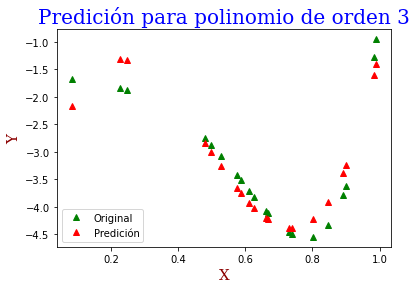

In [5]:
plt.plot(spo['x1'],spo['y1'],'g^')
plt.plot(spo['x1'],prediccion_entrenamiento,'r^')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Predición para polinomio de orden 3", fontdict = font1)
plt.xlabel('X', fontdict = font2)
plt.ylabel('Y', fontdict = font2)
plt.legend(['Original','Predición'])


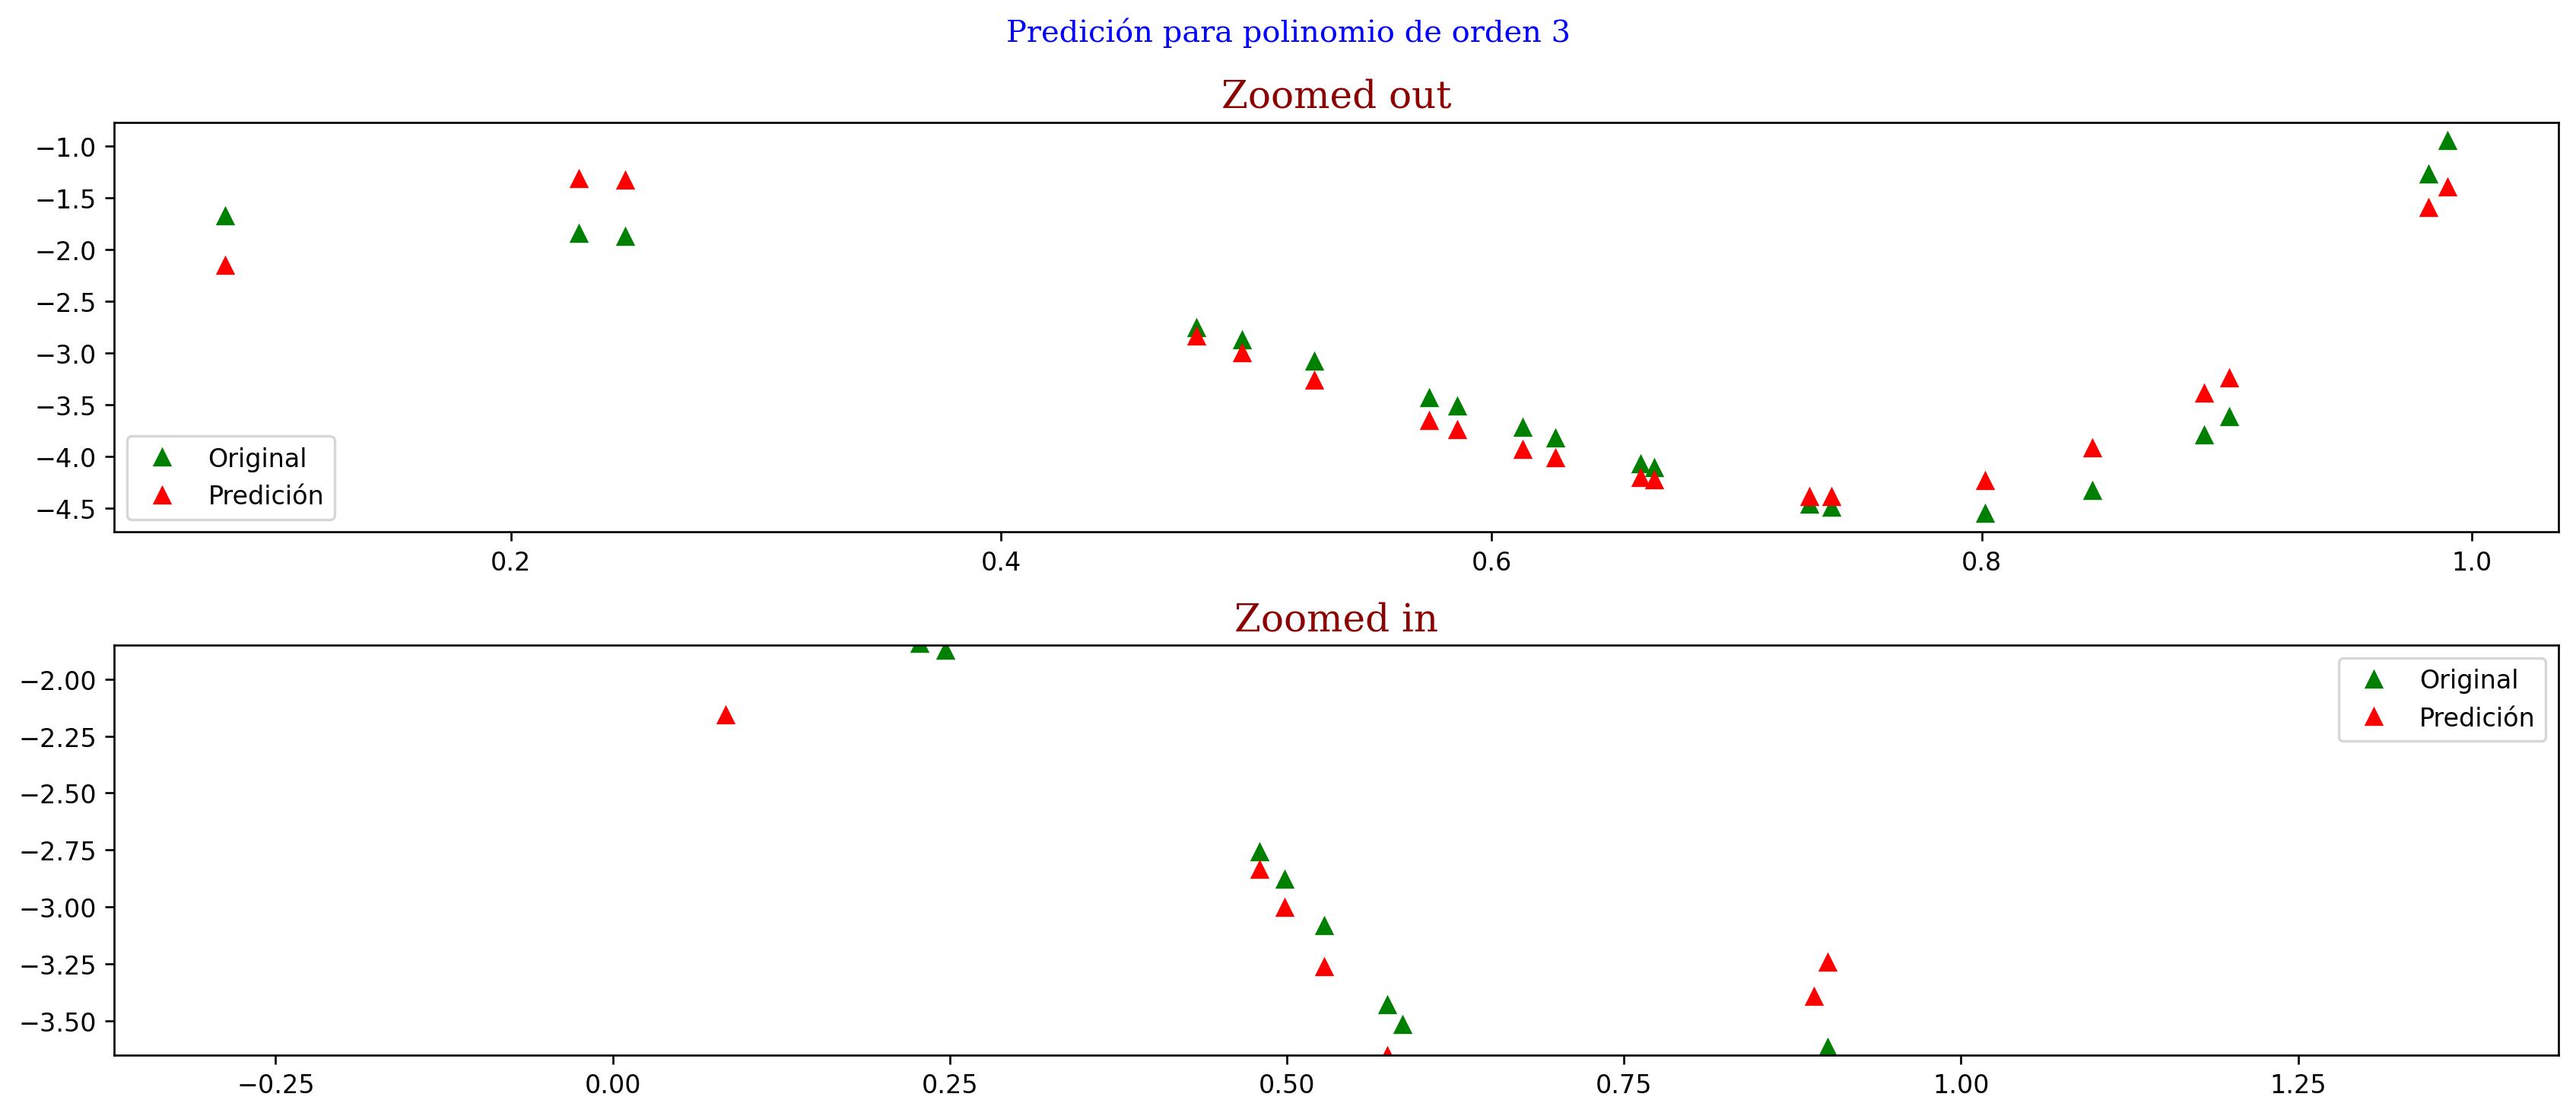

In [6]:
fig, (ax2,ax1) = plt.subplots(2, 1, constrained_layout= True, figsize=(14,6), dpi=240,facecolor='w', edgecolor='k')

ax1.margins(x=0.5, y=-0.25)
ax1.plot(spo['x1'],spo['y1'],'g^')
ax1.plot(spo['x1'],prediccion_entrenamiento,'r^')
ax1.set_title('Zoomed in', fontdict = font2)
ax1.legend(['Original','Predición'])
fig.suptitle('Predición para polinomio de orden 3', fontdict = font1)


ax2.plot(spo['x1'],spo['y1'],'g^')
ax2.plot(spo['x1'],prediccion_entrenamiento,'r^')
ax2.set_title('Zoomed out', fontdict = font2)
ax2.legend(['Original','Predición'])

# Para el caso general.

In [7]:
import scipy.integrate as integrate
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
regression = []
error1 = []
error2 = []
degreee = []
# Se recorre con un for de números inpares.
for degree in range(3, 20, 2):

  # Importamos la clase de Regresión Lineal de scikit-learn
  from sklearn.linear_model import LinearRegression 
  # para generar características polinómicas
  from sklearn.preprocessing import PolynomialFeatures 
  pf = PolynomialFeatures(degree)    # usaremos polinomios de grado 3
  X  = pf.fit_transform(spo['x1'].values.reshape(-1,1))
  regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
  # instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
  regresion_lineal.fit(X, spo['y1']) 
  # Guardamos en un array los datos de el polinomio obtenido

  items = []
  for x in range(degree):
    #print(x)
    if not x:
        items.append('{:.4f}'.format(regresion_lineal.intercept_))
        continue
        
    items.append('{:.4f}x^{:.0f}'.format(regresion_lineal.coef_[x] if regresion_lineal.coef_[x] != 1 else '', x))
    
    result = ' + '.join(items)
    result = result.replace('x^0', '')
    result = result.replace('^1 ', ' ')
    result = result.replace('+ -', '- ')
  
  regression.append(result)
  
  # Predecimos los valores y para los datos usados en el entrenamiento
  prediccion_entrenamiento = regresion_lineal.predict(X)
  # Calculamos el Error de Entrenamiento o de Estimacion 
  error_entrenamiento = np.sum(np.power(np.subtract(spo['y1'], prediccion_entrenamiento),2))
  #print("El error de entrenamiento es {:.8f}".format(error_entrenamiento))
  # Calculamos el Error de Entre funciones.
  error_funciones = integrate.simps(np.power(np.subtract(spo['y1'], prediccion_entrenamiento),2))

  #Guardamos los resultados.
  error1.append(error_entrenamiento)
  error2.append(error_funciones)
  degreee.append(degree)

In [8]:
regression

['-3.6325 + 22.8569x - 66.1704x^2',
 '-1.5908 - 1.0341x - 0.6695x^2 + 12.6188x^3 - 60.3793x^4',
 '-1.5000 - 3.0000x + 13.0000x^2 - 30.0000x^3 + 6.0000x^4 + 0.0000x^5 + 15.0000x^6',
 '-1.5000 - 3.0000x + 13.0000x^2 - 30.0000x^3 + 6.0000x^4 - 0.0000x^5 + 15.0000x^6 - 0.0000x^7 + 0.0000x^8',
 '-1.5000 - 3.0000x + 13.0000x^2 - 30.0000x^3 + 6.0000x^4 + 0.0000x^5 + 15.0000x^6 + 0.0000x^7 - 0.0000x^8 + 0.0000x^9 - 0.0000x^10',
 '-1.5000 - 3.0000x + 13.0000x^2 - 30.0000x^3 + 6.0001x^4 - 0.0003x^5 + 15.0007x^6 - 0.0013x^7 + 0.0018x^8 - 0.0017x^9 + 0.0012x^10 - 0.0005x^11 + 0.0002x^12',
 '-1.5000 - 3.0000x + 13.0001x^2 - 30.0007x^3 + 6.0044x^4 - 0.0189x^5 + 15.0597x^6 - 0.1407x^7 + 0.2516x^8 - 0.3419x^9 + 0.3511x^10 - 0.2682x^11 + 0.1477x^12 - 0.0555x^13 + 0.0127x^14',
 '-1.5000 - 3.0000x + 13.0003x^2 - 30.0032x^3 + 6.0198x^4 - 0.0852x^5 + 15.2640x^6 - 0.5937x^7 + 0.9516x^8 - 1.0027x^9 + 0.4605x^10 + 0.4957x^11 - 1.2378x^12 + 1.3013x^13 - 0.8420x^14 + 0.3458x^15 - 0.0834x^16',
 '-1.5000 - 3.0000

In [9]:
rounded_df = pd.DataFrame(list(zip(degreee, regression, error1, error2)),
               columns =['Grado de regresión','Polinomio', 'Error de entrenamiento', 'Error de estimación'])

In [10]:
rounded_df.head()

,Grado de regresión,Polinomio,Error de entrenamiento,Error de estimación
0,3,-3.6325 + 22.8569x - 66.1704x^2,1.962567e+00,1.905025e+00
1,5,-1.5908 - 1.0341x - 0.6695x^2 + 12.6188x^3 - 6...,4.262546e-05,4.157746e-05
2,7,-1.5000 - 3.0000x + 13.0000x^2 - 30.0000x^3 + ...,5.422926e-28,5.533572e-28
3,9,-1.5000 - 3.0000x + 13.0000x^2 - 30.0000x^3 + ...,4.779511e-28,4.484921e-28
4,11,-1.5000 - 3.0000x + 13.0000x^2 - 30.0000x^3 + ...,3.683487e-28,3.659863e-28


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

constrained_layout not applied.  At least one axes collapsed to zero width or height.



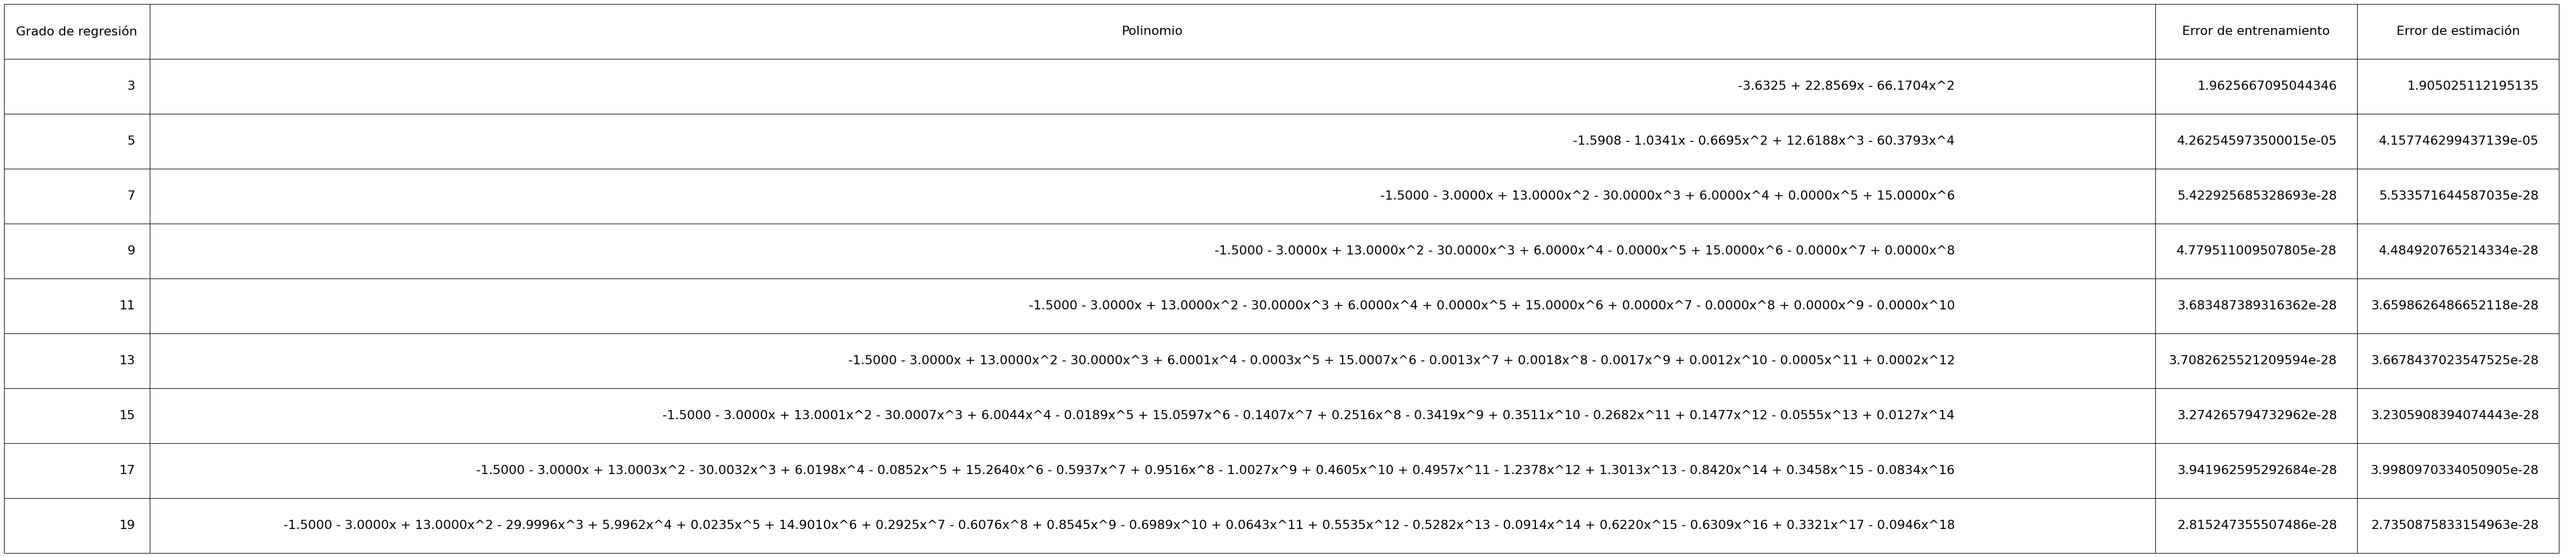

In [109]:
import matplotlib.pyplot as plt

fig =plt.figure(constrained_layout= True, figsize=(20,15) ,facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
column_labels=['Grado de regresión','Polinomio', 'Error de entrenamiento', 'Error de estimación']
ax.axis('tight')
ax.axis('off')
the_table = plt.table(cellText= rounded_df.values, colLabels=column_labels, loc='center right')

the_table.auto_set_font_size(False)
the_table.set_fontsize(22)
the_table.scale(8, 8)
the_table.auto_set_column_width(col=list(range(len(rounded_df.columns)))) # Provide integer list of columns to adjust
plt.show()

####

Instancias necesarias.

In [ ]:
! pip install -c plotly plotly chart-studio